In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Input
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras import optimizers
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import scipy.stats as stats
from keras.layers import Bidirectional

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
stock='/content/drive/MyDrive/Colab Notebooks/SP500Data.csv'
data=pd.read_csv(stock)

In [ ]:
data.shape

(4749, 7)

In [ ]:
data.isnull().sum()

Date           0
Price          0
Open           0
High           0
Low            0
Vol.        4749
Change %       0
dtype: int64

In [ ]:
data.head(4749)

,Date,Price,Open,High,Low,Vol.,Change %
0,38108.00,1122.20,1108.50,1122.20,1108.50,NaN,0.01
1,38139.00,1123.70,1122.20,1124.50,1118.40,NaN,0.00
2,38169.00,1126.30,1123.70,1126.30,1116.50,NaN,0.00
3,38200.00,1131.90,1126.30,1131.90,1124.90,NaN,0.01
4,38231.00,1121.90,1131.90,1131.90,1120.90,NaN,-0.01
...,...,...,...,...,...,...,...
4744,44753.00,3806.80,3780.71,3813.95,3764.70,NaN,0.01
4745,44784.00,3828.11,3817.02,3859.40,3786.28,NaN,0.01
4746,44815.00,3748.57,3810.94,3818.20,3744.22,NaN,-0.02
4747,44845.00,3956.37,3859.89,3958.33,3859.89,NaN,0.06


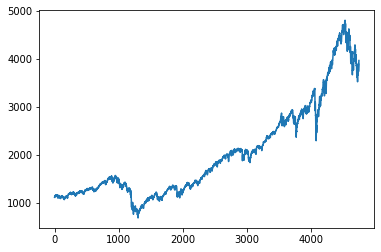

In [ ]:
data1=data.iloc[:,2:3].values
data1
plt.plot(data1)

In [ ]:
data_train = data1[0:np.int16(0.8*data1.shape[0])]
data_test = data1[np.int16(0.8*data1.shape[0]):]

In [ ]:
data_train.mean()
data_z = (data_train-data_train.mean())/(data_train.std())
data_z.mean()

1.7955278397728248e-16

In [ ]:
x_train = []
y_train = []

for i in range (5, len(data_z)):
  x_train.append(data_z[i-5:i,0])
  y_train.append(data_z[i,0])
  if i<=10:
    print(x_train)
    print(y_train)
    print()

[array([-0.94041877, -0.914555  , -0.9117232 , -0.90681475, -0.8962427 ])]
[-0.9151213595143601]

[array([-0.94041877, -0.914555  , -0.9117232 , -0.90681475, -0.8962427 ]), array([-0.914555  , -0.9117232 , -0.90681475, -0.8962427 , -0.91512136])]
[-0.9151213595143601, -0.9051156674064058]

[array([-0.94041877, -0.914555  , -0.9117232 , -0.90681475, -0.8962427 ]), array([-0.914555  , -0.9117232 , -0.90681475, -0.8962427 , -0.91512136]), array([-0.9117232 , -0.90681475, -0.8962427 , -0.91512136, -0.90511567])]
[-0.9151213595143601, -0.9051156674064058, -0.9164428660191843]

[array([-0.94041877, -0.914555  , -0.9117232 , -0.90681475, -0.8962427 ]), array([-0.914555  , -0.9117232 , -0.90681475, -0.8962427 , -0.91512136]), array([-0.9117232 , -0.90681475, -0.8962427 , -0.91512136, -0.90511567]), array([-0.90681475, -0.8962427 , -0.91512136, -0.90511567, -0.91644287])]
[-0.9151213595143601, -0.9051156674064058, -0.9164428660191843, -0.8988857081693776]

[array([-0.94041877, -0.914555  , -0.9

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[-0.94041877],
        [-0.914555  ],
        [-0.9117232 ],
        [-0.90681475],
        [-0.8962427 ]],

       [[-0.914555  ],
        [-0.9117232 ],
        [-0.90681475],
        [-0.8962427 ],
        [-0.91512136]],

       [[-0.9117232 ],
        [-0.90681475],
        [-0.8962427 ],
        [-0.91512136],
        [-0.90511567]],

       ...,

       [[ 1.96023137],
        [ 1.96008034],
        [ 1.97656142],
        [ 2.03672772],
        [ 2.06850051]],

       [[ 1.96008034],
        [ 1.97656142],
        [ 2.03672772],
        [ 2.06850051],
        [ 2.07637292]],

       [[ 1.97656142],
        [ 2.03672772],
        [ 2.06850051],
        [ 2.07637292],
        [ 2.1176228 ]]])

In [ ]:
from typing import Sequence
model = Sequential()
model.add(Conv1D(64, 1, activation='relu',  input_shape=(x_train.shape[1],1)))
#model.add(MaxPooling1D(pool_size=1))
model.add(Bidirectional(LSTM(64, activation='relu')))
model.add(Dense(1))
model.compile(loss='mean_absolute_error',optimizer='adam')
history=model.fit(x_train,y_train, epochs=100, batch_size=20)

Epoch 1/100
190/190 [==============================] - 4s 8ms/step - loss: 0.0840
Epoch 2/100
190/190 [==============================] - 2s 8ms/step - loss: 0.0337
Epoch 3/100
190/190 [==============================] - 1s 8ms/step - loss: 0.0332
Epoch 4/100
190/190 [==============================] - 2s 8ms/step - loss: 0.0309
Epoch 5/100
190/190 [==============================] - 1s 8ms/step - loss: 0.0315
Epoch 6/100
190/190 [==============================] - 1s 8ms/step - loss: 0.0307
Epoch 7/100
190/190 [==============================] - 2s 8ms/step - loss: 0.0284
Epoch 8/100
190/190 [==============================] - 2s 8ms/step - loss: 0.0297
Epoch 9/100
190/190 [==============================] - 1s 8ms/step - loss: 0.0277
Epoch 10/100
190/190 [==============================] - 2s 10ms/step - loss: 0.0283
Epoch 11/100
190/190 [==============================] - 3s 14ms/step - loss: 0.0263
Epoch 12/100
190/190 [==============================] - 2s 10ms/step - loss: 0.0250
Epoch 13/1

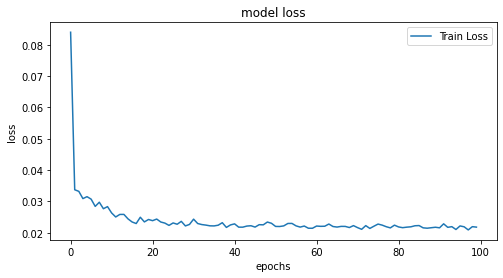

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [ ]:
data_z_test = (data_test-data_train.mean())/(data_train.std())

In [ ]:
x_test = []
y_test = []

for i in range (5, len(data_z_test)):
  x_test.append(data_z_test[i-5:i,0])
  y_test.append(data_z_test[i,0])
  if i<=10:
    print(x_test)
    print(y_test)
    print()

[array([2.09721496, 2.04969736, 2.08753021, 2.10680532, 2.15908034])]
[2.1462428522325934]

[array([2.09721496, 2.04969736, 2.08753021, 2.10680532, 2.15908034]), array([2.04969736, 2.08753021, 2.10680532, 2.15908034, 2.14624285])]
[2.1462428522325934, 2.177845736362245]

[array([2.09721496, 2.04969736, 2.08753021, 2.10680532, 2.15908034]), array([2.04969736, 2.08753021, 2.10680532, 2.15908034, 2.14624285]), array([2.08753021, 2.10680532, 2.15908034, 2.14624285, 2.17784574])]
[2.1462428522325934, 2.177845736362245, 2.194912048938832]

[array([2.09721496, 2.04969736, 2.08753021, 2.10680532, 2.15908034]), array([2.04969736, 2.08753021, 2.10680532, 2.15908034, 2.14624285]), array([2.08753021, 2.10680532, 2.15908034, 2.14624285, 2.17784574]), array([2.10680532, 2.15908034, 2.14624285, 2.17784574, 2.19491205])]
[2.1462428522325934, 2.177845736362245, 2.194912048938832, 2.2133565040133067]

[array([2.09721496, 2.04969736, 2.08753021, 2.10680532, 2.15908034]), array([2.04969736, 2.08753021, 2.

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions_r = ((predictions*(data_train.std()))+(data_train.mean()))

In [ ]:
mae = mean_absolute_error(data_test[5:],predictions_r)
mae

50.90340486524471

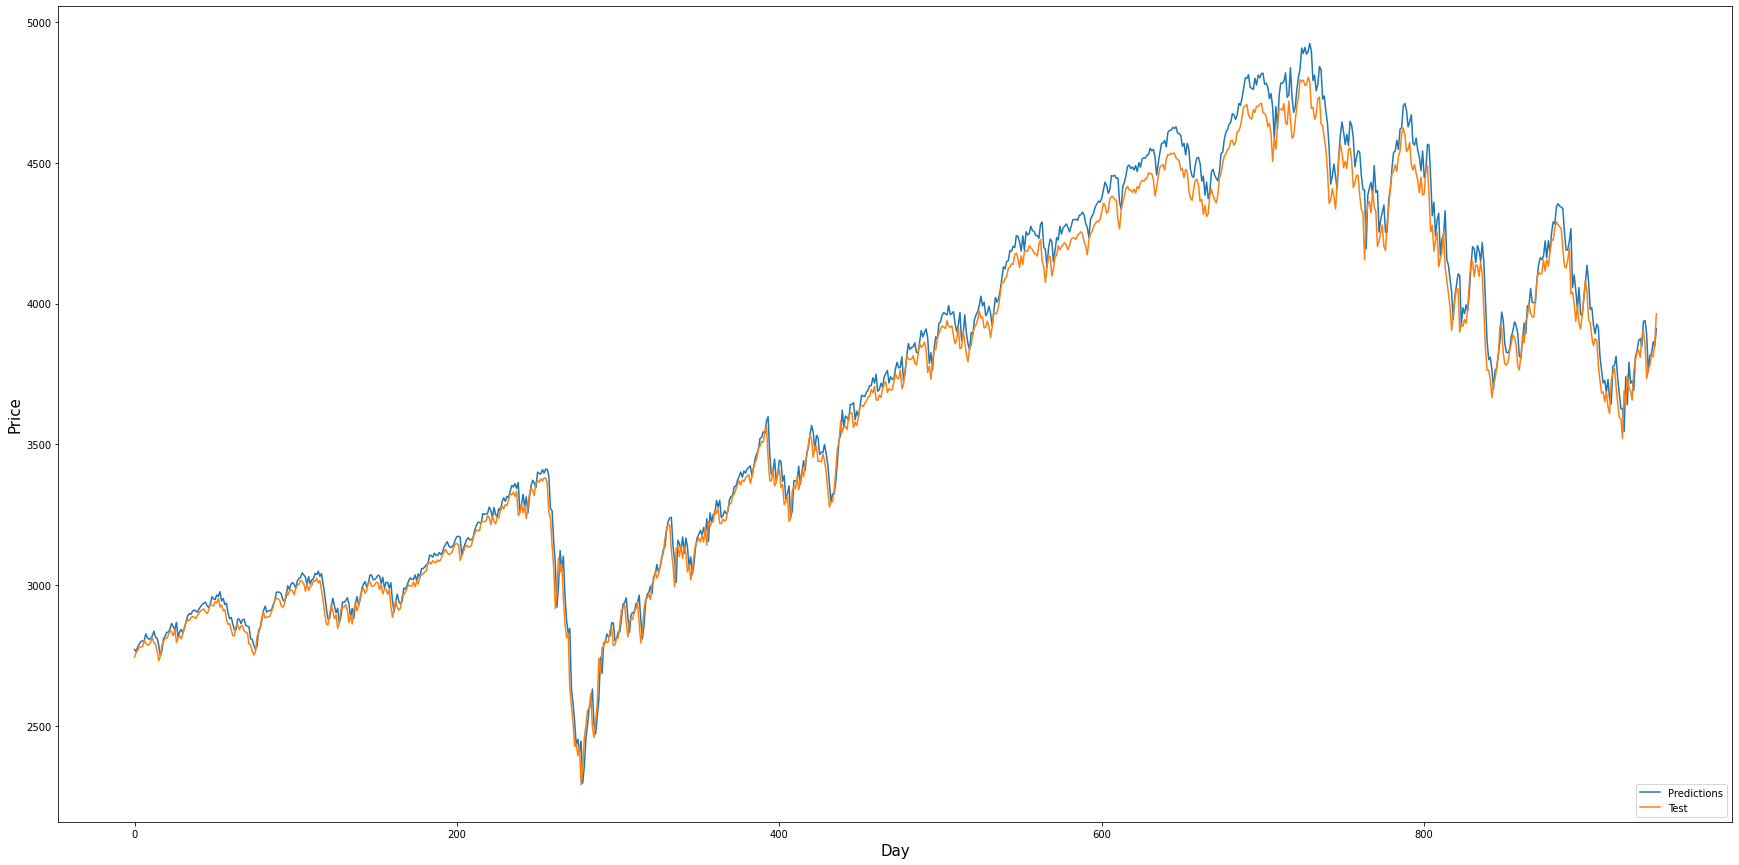

In [ ]:
plt.figure(figsize=(30,15))
plt.plot(predictions_r)
plt.plot(data_test[5:])
plt.legend(['Predictions','Test'], loc='lower right')
plt.ylabel('Price',fontsize = 15)
plt.xlabel('Day',fontsize = 15)
plt.show()